In [1]:
#Code modified from Will Koehrsen and customized using https://stackoverflow.com
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df = pd.read_csv("austin-forest-data-num.csv")
df.head()


FileNotFoundError: File b'austin-forest-data-num.csv' does not exist

In [2]:
import numpy as np
labels = np.array(df['TempHighF'])
features= df.drop('TempHighF', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [3]:
# Train and Test data
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)

In [4]:
# The baseline predictions are the historical averages that you must set your model to
baseline_preds = test_features[:, feature_list.index('Hist_Avg_High')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.09


In [5]:
# Initialize the model with 1000 decision trees and then train the model on training data with Scikit-learn
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)

In [6]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4.06 degrees.


In [7]:
#Calculate mean absolute percentage error and display accuracy of the model
mean_abs_err = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mean_abs_err)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.35 %.


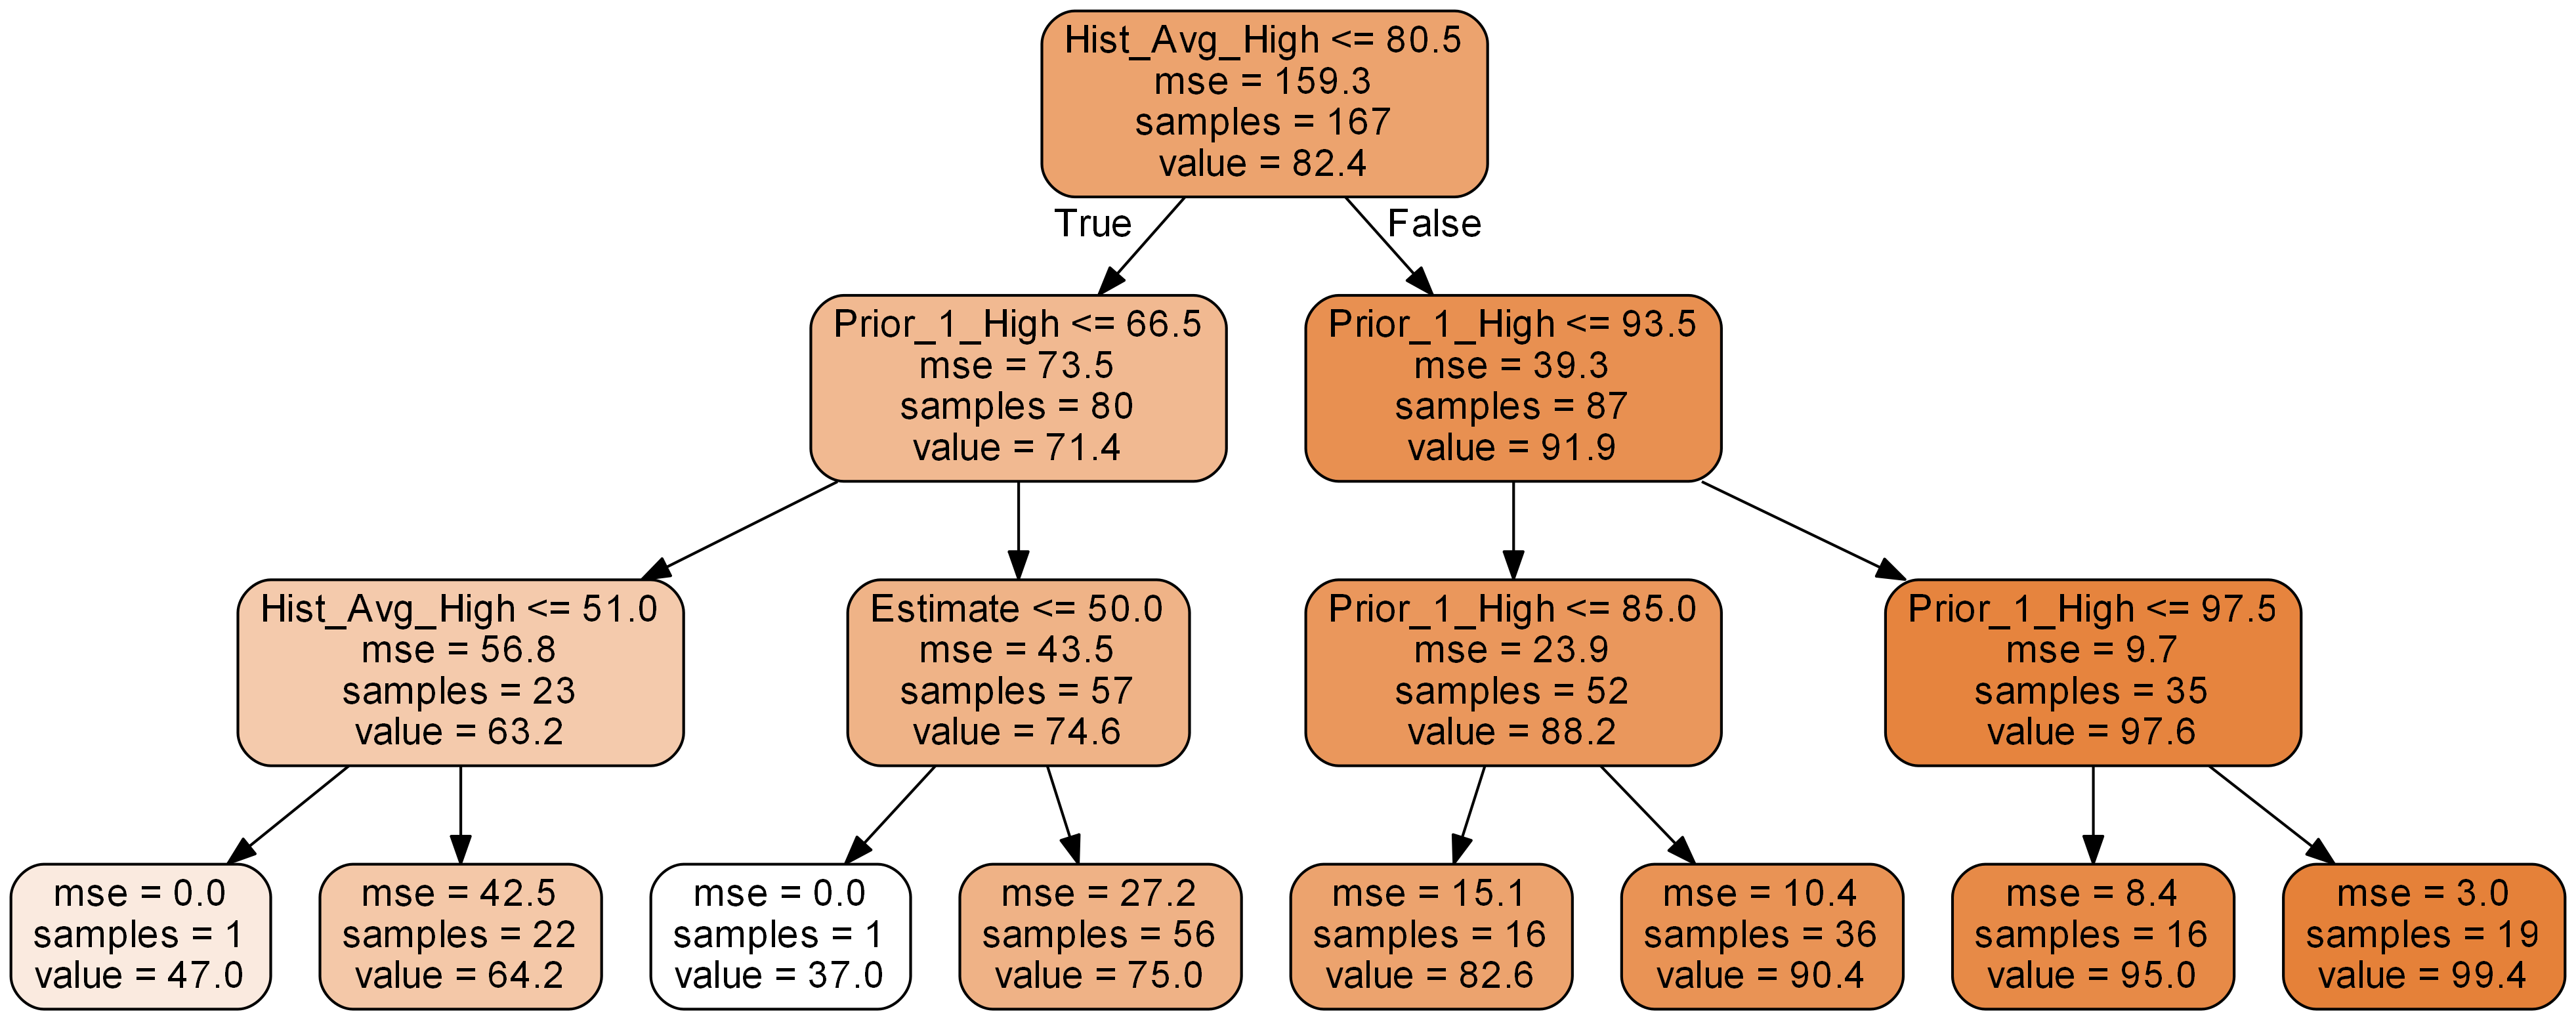

In [8]:
from sklearn.tree import export_graphviz
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'small_tree.dot', '-o', 'small_tree.png', '-Gdpi=300'])
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'small_tree.png')

In [9]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Hist_Avg_High        Importance: 0.59
Variable: Prior_1_High         Importance: 0.29
Variable: Dy                   Importance: 0.03
Variable: Pior_2_High          Importance: 0.03
Variable: Estimate             Importance: 0.03
Variable: Mon                  Importance: 0.02
Variable: Yr                   Importance: 0.0
Variable: Friday               Importance: 0.0
Variable: Saturday             Importance: 0.0
Variable: Sunday               Importance: 0.0
Variable: Monday               Importance: 0.0
Variable: Tuesday              Importance: 0.0
Variable: Wednesday            Importance: 0.0
Variable: Thursday             Importance: 0.0


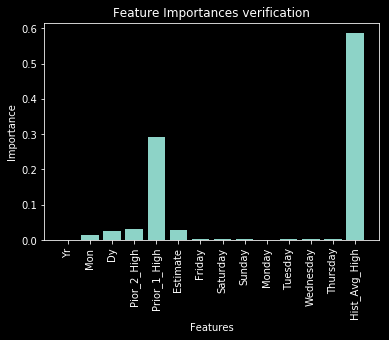

In [10]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as chrt
%matplotlib inline
# Set the style
chrt.style.use('dark_background')
# list of x locations for plotting
x_values = list(range(len(importances)))
chrt.bar(x_values, importances, orientation = 'vertical')
chrt.xticks(x_values, feature_list, rotation='vertical')
chrt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importances verification');

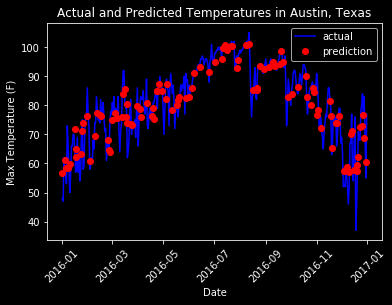

In [14]:
import datetime
# List the dates of training values and then convert to datetime object 
months = features[:, feature_list.index('Mon')]
days = features[:, feature_list.index('Dy')]
years = features[:, feature_list.index('Yr')]
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with actual values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Use the dates of predictions from the test set
months = test_features[:, feature_list.index('Mon')]
days = test_features[:, feature_list.index('Dy')]
years = test_features[:, feature_list.index('Yr')]
# List the column of dates and convert to datetime objects
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predicted values and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values on the visualiztation
chrt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
chrt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
chrt.xticks(rotation = '45'); 
chrt.legend()
# Graph labels
chrt.xlabel('Date'); chrt.ylabel('Max Temperature (F)'); chrt.title('Actual and Predicted Temperatures in Austin, Texas');
